# Exercise 3.01

In [1]:
# load classification data
import numpy as np
import pandas as pd
notebook = __name__ == '__main__'
X = pd.read_csv('../data/tree_class_feats.csv')
y = pd.read_csv('../data/tree_class_target.csv')

# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1]) 
print("Possible Output Classes = ", np.unique(y))

Number of Examples in the Dataset =  10000
Number of Features for each example =  10
Possible Output Classes =  [0 1]


In [2]:
# Define your model as a Keras sequential model 
from keras.models import Sequential
from tensorflow import random
random.set_seed(42)
np.random.seed(42)
model = Sequential()

Using TensorFlow backend.


In [3]:
# Add one hidden layer of size 10 with activation function of type tanh to your model
from keras.layers import Dense, Activation
model.add(Dense(10, activation='tanh', input_dim=X.shape[1]))

In [4]:
# Add another hidden layer, this time of size 5, with activation function of type tanh 
model.add(Dense(5, activation='tanh'))

In [5]:
# Add the output layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train your model for 100 epochs and batch size equal to 5
history = model.fit(X, y, epochs=100, batch_size=5, verbose=1, validation_split=0.2, shuffle=False)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 273us/step - loss: 0.3609 - accuracy: 0.8393 - val_loss: 0.3119 - val_accuracy: 0.8660
Epoch 2/100
8000/8000 [==============================] - 2s 263us/step - loss: 0.3102 - accuracy: 0.8668 - val_loss: 0.2862 - val_accuracy: 0.8765
Epoch 3/100
8000/8000 [==============================] - 2s 251us/step - loss: 0.2852 - accuracy: 0.8766 - val_loss: 0.2644 - val_accuracy: 0.8920
Epoch 4/100
8000/8000 [==============================] - 2s 252us/step - loss: 0.2627 - accuracy: 0.8881 - val_loss: 0.2436 - val_accuracy: 0.8990
Epoch 5/100
8000/8000 [==============================] - 2s 235us/step - loss: 0.2384 - accuracy: 0.9018 - val_loss: 0.2154 - val_accuracy: 0.9125
Epoch 6/100
8000/8000 [==============================] - 2s 237us/step - loss: 0.2190 - accuracy: 0.9109 - val_loss: 0.2023 - val_accuracy: 0.9200
Epoch 7/100
8000/8000 [==============================] - 2s 231us/step

Epoch 56/100
8000/8000 [==============================] - 2s 220us/step - loss: 0.1516 - accuracy: 0.9430 - val_loss: 0.1584 - val_accuracy: 0.9360
Epoch 57/100
8000/8000 [==============================] - 2s 217us/step - loss: 0.1519 - accuracy: 0.9423 - val_loss: 0.1523 - val_accuracy: 0.9395
Epoch 58/100
8000/8000 [==============================] - 2s 223us/step - loss: 0.1509 - accuracy: 0.9416 - val_loss: 0.1521 - val_accuracy: 0.9380
Epoch 59/100
8000/8000 [==============================] - 2s 218us/step - loss: 0.1496 - accuracy: 0.9429 - val_loss: 0.1433 - val_accuracy: 0.9445
Epoch 60/100
8000/8000 [==============================] - 2s 200us/step - loss: 0.1492 - accuracy: 0.9423 - val_loss: 0.1458 - val_accuracy: 0.9385
Epoch 61/100
8000/8000 [==============================] - 2s 210us/step - loss: 0.1481 - accuracy: 0.9438 - val_loss: 0.1443 - val_accuracy: 0.9440
Epoch 62/100
8000/8000 [==============================] - 2s 220us/step - loss: 0.1478 - accuracy: 0.9441 - val_

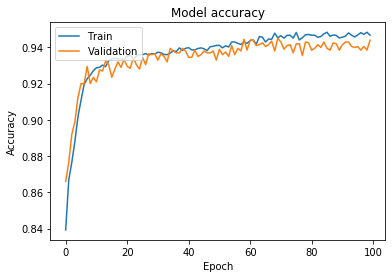

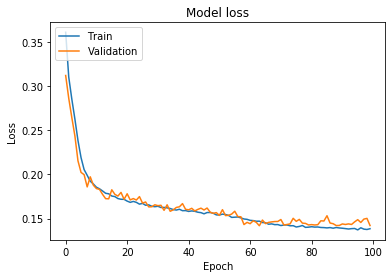

In [8]:
if notebook:
    import matplotlib.pyplot as plt
    %matplotlib inline

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [10]:
# Use your trained model to predict the output class for the first 10 input data examples
y_predicted = model.predict(X.iloc[0:10,:]) 

# print the predicted classes
print("Predicted probability for each of the examples belonging to class 1: "),
print(y_predicted)
print("Predicted class label for each of the examples: "), 
print(np.round(y_predicted))

Predicted probability for each of the examples belonging to class 1: 
[[0.00354007]
 [0.8302744 ]
 [0.00316998]
 [0.95335543]
 [0.99479216]
 [0.00334176]
 [0.43222323]
 [0.00391936]
 [0.00332899]
 [0.99759173]]
Predicted class label for each of the examples: 
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
